In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os


In [2]:
#Load and preprocessing
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [8]:
model_path = "cifar10_cnn_model.h5"
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print("Model loaded from file")
else:
    model = models.Sequential(
        [
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(10),
          ]
    )
    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    model.fit(
        train_images,
        train_labels,
        epochs=10,
        validation_data=(test_images, test_labels),
    )

    model.save(model_path)
    print("Model saved")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.3559 - loss: 1.7456 - val_accuracy: 0.5587 - val_loss: 1.2334
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.5662 - loss: 1.2123 - val_accuracy: 0.5921 - val_loss: 1.1664
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6371 - loss: 1.0323 - val_accuracy: 0.6535 - val_loss: 0.9827
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6744 - loss: 0.9222 - val_accuracy: 0.6699 - val_loss: 0.9416
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.7057 - loss: 0.8387 - val_accuracy: 0.6800 - val_loss: 0.9117
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.7285 - loss: 0.7772 - val_accuracy: 0.7024 - val_loss: 0.8776
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.7447 - loss: 0.7252 - val_accuracy: 0.7027 - val_loss: 0.8671
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.7547 -

Model saved


In [9]:
def classify_image(image):
    img_array = tf.expand_dims(image, 0)
    predictions = model.predict(img_array)
    prediction_class = tf.argmax(predictions[0]).numpy()
    return class_names[prediction_class]

def display_image(image, true_label):
    predicted_label = classify_image(image)
    plt.figure()
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


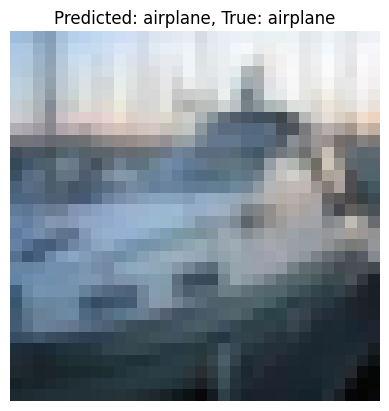

In [10]:
class_pred = classify_image(test_images[2])
display_image(test_images[2], class_pred)